<a href="https://colab.research.google.com/github/jaeyoungphysics/ML/blob/main/3_ANN_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Neural Network with PyTorch**

In [ ]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt

### **1) ANN의 이론적 배경**

인공 신경망 (Artificial neural network)에 대한 내용을 이해하고 PyTorch로 간단한 모델을 직접 만들어본다

* **용어 정리**\
ML, DL에서 사용하는 용어 정리

* **퍼셉트론 (Perceptron)**\
초기 ANN 퍼셉트론에 대한 이해

* **역전파 (BackPropagation)**\
ML, DL의 가중치를 업데이트 하기위한 역전파 이해

* **활성화 함수 (Activation Function)**\
ML, DL 모델의 출력값을 생성하는 활성화 함수 이해

##### **1-1) 용어 정리**

ML, DL 에서 모델을 학습시킨 후 평가하기 위해 데이터를 주로 Training, Validation, Test set으로 나눈다

* **Training set** : 모델을 학습시키기 위한 데이터

* **Validation set** : 모델의 성능 조정을 위한 데이터 (hyperparameter tune, 과적합 여부 판단 등)

* **Test set** : 조정이 끝난 모델의 성능 평가를 위한 데이터

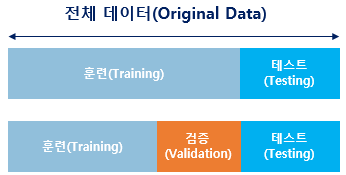

많은 경우 ML, DL로 풀고자 하는 문제는 Classification, Regression으로 나뉜다

* **Classification** : 받은 입력 데이터에 대해서 class를 정하는 문제
* **Regression** : Class를 나누는 것 처럼 discrete한 출력이 아닌, continuous 한 출력을 가진다 (공부시간-시험점수 예측, 시계열 데이터를 통한 주가 예측 등)

ML, DL의 학습 방식은 크게 지도 학습, 비지도 학습, 강화 학습으로 나뉜다

* **지도 학습 (Supervised Learning)** : 모델이 입력 데이터와 함께 정답 (label 등)을 사용하여 학습하는 방식, 모델은 예측값과 정답 사이의 오차를 줄이도록 학습한다

* **비지도 학습 (Unsupervised Learning)** : 모델이 정답 (label) 없이 학습하는 방식, 데이터가 어떻게 구성되었는지 알아내는 문제가 주로 속하며 Clustering 같은 문제가 이에 해당한다

* **강화 학습 (Reinforcement Learning)** : 특정 환경 안에서 정의된 agent가 현 상태를 인식하고, 선택 가능한 행동 중 보상을 최대화하는 행동을 선택하는 방식으로 학습, 대표적으로 알파고가 이에 속한다

데이터 한 개, 한 개를 샘플(sample), 데이터 하나가 가지는 여러가지 정보(독립 변수)를 특성(feature)이라고 한다

엑셀로 자료를 정리한 것을 생각하면 각 행이 하나의 sample, 열들이 샘플이 가지는 feature를 나타낸다

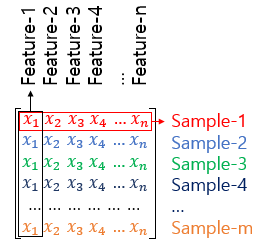

ML, DL 모델의 평가 지표는 Loss, Accuracy 이외에도 많이 존재한다

이를 한 눈에 보기 위해 아래와 같은 혼동행렬 (Confusion matrix)를 사용하기도 한다

|   |실제 True|실제 False|
|---|:-------:|:--------:|
|예측 True|TP |      FP  |
|예측 False|FN|      TN  |

대표적인 평가 지표는 아래와 같다


* **정확도 (Accuracy)** : 모델이 맞춘 정답의 비율, $\frac{TP+TN}{TP+FP+TN+FN}$
* **정밀도 (Precision)** : 모델이 True라고 예측한 샘플 중 실제 True(TP)의 비율, $\frac{TP}{TP+FP}$
* **재현률 (Recall)** : 실제 True중, 모델이 제대로 예측한 샘플의 비율, $\frac{TP}{TP+FN}$

이외에도 각 threshold 마다 TPR (True positive rate, recall과 동일), FPR (False positive rate, 실제 False중 True로 잘못 예측된 비율) 을 계산해 그린 ROC curve 등이 존재한다



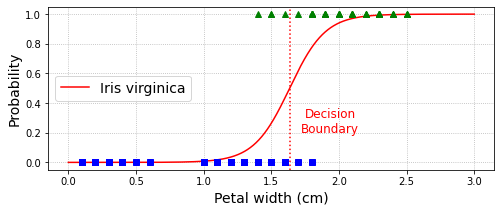

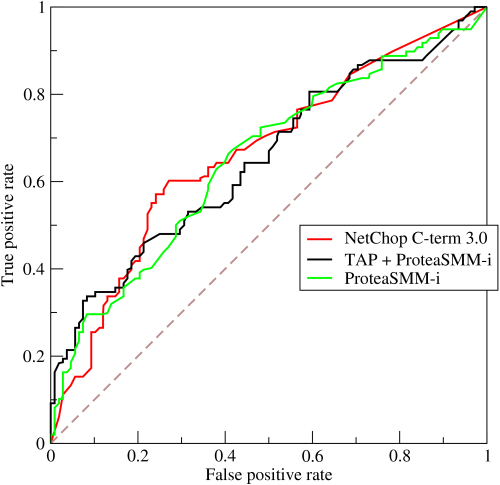

* **과적합 (Overfitting)** : 모델이 Train set을 과도하게 학습하여 내부 파라미터(가중치, 편향)이 train set에 치우쳐서 학습되는 경우 이를 과적합 (Overfitting) 이라고 한다
* **과소적합 (Underfitting)** : 아직 모델이 충분히 학습하지 못했는데 학습을 중지하는 경우 과소적합 (underfitting) 이라고 한다

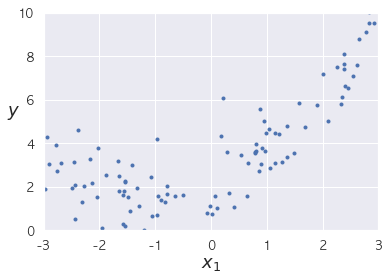

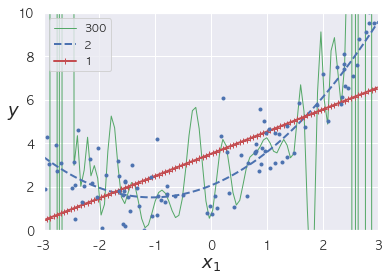

과적합, 과소적합 여부는 Train과 validation (혹은 test)셋의 loss를 확인하여 알 수 있다

아래 그래프의 경우, 약 3~4 epoch 이후 과적합이 발생함을 알 수 있다

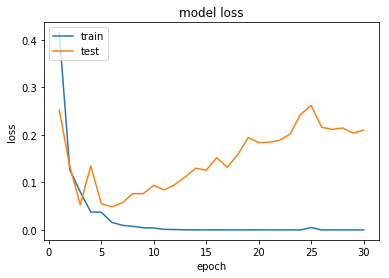

이런 과적합을 막기위해 다음과 같은 방법이 사용될 수 있다

* 데이터의 양을 늘리기

* 모델의 복잡도 (layer, node 수 등) 줄이기

* 가중치 규제 (Regularization) 적용하기

* 특정 Node를 학습에서 사용하지 않는 Dropout 기법 사용

##### **1-2) Perceptron**

1957년 처음 고안된 초기 형태의 ANN, 다수의 입력을 받아 하나의 결과를 내보내는 알고리즘이다

실제 신경 세포의 동작과 유사하게 작동한다

뉴런은 다수의 가지돌기에서 신호를 받아들이고, 이 신호가 일정 threshold를 넘어가면 축삭돌기를 통해 다음 뉴런으로 신호를 전달한다

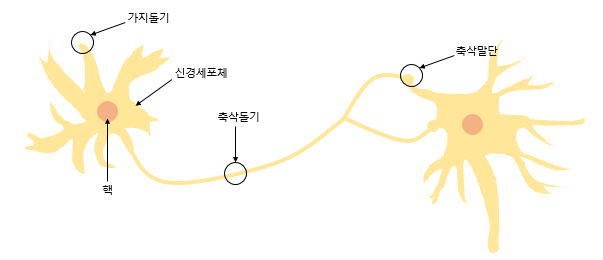

이와 같이, perceptron 또한 다수의 입력을 받고 ($x_1, x_2 ... x_n)$ 이에 가중치 $(W_1, W_2 ... W_n)$ 를 곱하고, 이 값이 threshhold를 넘는지 여부에 따라 출력값 $y$ 을 계산한다

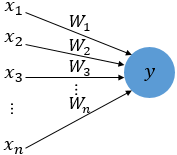

가중치 $W_i$가 크다는 것은 입력 $x_i$가 그만큼 중요하다는 것을 나타낸다

이렇게 계산된 $\sum{x_i W_i}$ 가 threshold를 넘으면 출력으로 $y=1$, 아니라면 $y=0$ 을 가진다

이를 아주 간단한 그래프로 표현하면 아래와 같은 step function이 된다

만약 이 step function 대신 Sigmoid function을 쓰면, 이 과정은 Logistic regression과 동일함을 알 수 있다

이런 출력값을 변경시키는 함수를 Activation function 이라 하며 뒤에서 따로 다룬다

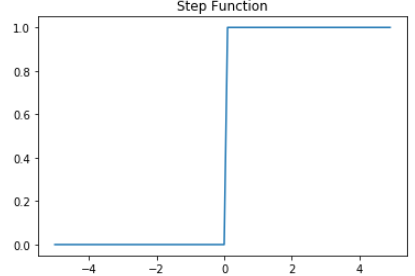

이를 수식으로 나타내면 아래와 같다 $(\theta = threshold)$

$if \sum_i^{n} W_{i}x_{i}\ ≥ \theta → y=1$

$if \sum_i^{n} W_{i}x_{i}\ < \theta → y=0$

혹은 아래와 같이 bias를 포함해 다시 표현할 수 있다

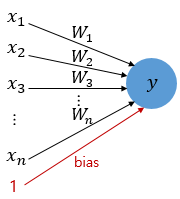

$if \sum_i^{n} W_{i}x_{i} + b ≥ 0 → y=1$

$if \sum_i^{n} W_{i}x_{i} + b < 0 → y=0$

아래 그림과 같이 한 층의 입력값을 받아 바로 출력값을 내는 perceptron을 단층 퍼셉트론(Single-layer perceptron, SLP)이라고 한다

각 단계를 보통 층(layer)라고 부르며 아래 그림의 경우 입력층 (input layer)와 출력층 (output layer)를 가진다

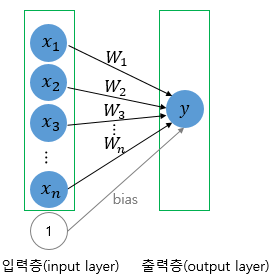

이런 perceptron을 여러 층 쌓아 다층 퍼셉트론 (Multi-layer perceptron, MLP)를 만들 수 있다

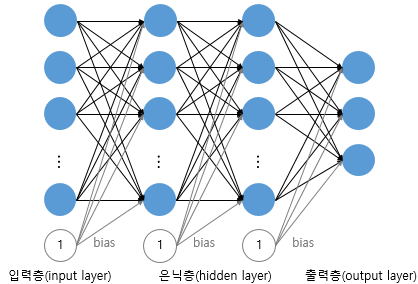

자세한 내용은 아래에서 다시 다룬다

##### **1-3) BackPropagation** 

지금까지는 모델이 미분을 통해 가중치와 편향을 업데이트 한다고 받아들였다

모델이 점점 복잡해지는 만큼, 이 과정이 실제로 어떻게 일어나는지 계산을 통해 확인해보자

아래와 같이 두 개의 입력값을 받고, 한개의 hidden layer를 거쳐 두 개의 출력값을 가지는 MLP를 고려해보자

여기서 각 $z_i$는 $\sum x_i W_i$ 를 나타내고, $h_i, o_i$ 는 $z_i$ 가 활성화 함수를 거친 후 출력값을 의미한다

과정을 간단하게 하기 위해 잠시 bias는 고려하지 않는다

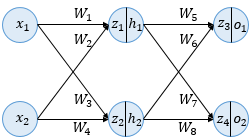

모델이 아래와 같이 초기화된 가중치를 가진다고 생각해보자

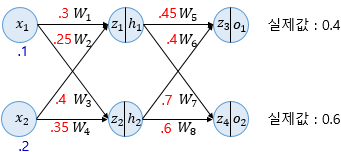

이 때 각 $Z_i$ 값은 다음과 같이 계산된다

$z_{1}=W_{1}x_{1} + W_{2}x_{2}=0.3 \text{×} 0.1 + 0.25 \text{×} 0.2= 0.08$\
$z_{2}=W_{3}x_{1} + W_{4}x_{2}=0.4 \text{×} 0.1 + 0.35 \text{×} 0.2= 0.11$

$h_{1}=sigmoid(z_{1}) = 0.51998934$\
$h_{2}=sigmoid(z_{2}) = 0.52747230$

$z_{3}=W_{5}h_{1}+W_{6}h_{2} = 0.45 \text{×} h_{1} + 0.4 \text{×} h_{2} = 0.44498412$\
$z_{4}=W_{7}h_{1}+W_{8}h_{2} = 0.7 \text{×} h_{1} + 0.6 \text{×} h_{2} = 0.68047592$\

이를 통해 최종적으로 출력되는 예측값은 아래와 같다

$o_{1}=sigmoid(z_{3})=0.60944600$\
$o_{2}=sigmoid(z_{4})=0.66384491$

이렇게 입력값을 받아 출력값을 계산하는 과정을 순전파 (Forward Propagation)이라 한다

이 예측값과 실제 값 사이의 오차를 MSE를 사용해 계산하자면 아래와 같다

$E_{o1}=\frac{1}{2}(target_{o1}-output_{o1})^{2}=0.02193381$\
$E_{o2}=\frac{1}{2}(target_{o2}-output_{o2})^{2}=0.00203809$\
$E_{total}=E_{o1}+E_{o2}=0.02397190$

이제, 이 값들을 토대로 가중치를 업데이트 하기위한 BackPropagation을 진행해보자

Layer와 Layer 사이를 이어주는 가중치를 업데이트 하므로, 총 2 단계의 BackPropagation이 필요하다

먼저 1단계 (출력 - hidden layer 사이 가중치 업데이트) backpropagation을 보자

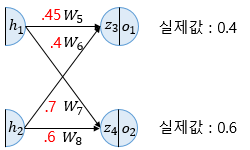

이 단계에서 업데이트할 가중치는 $W_5  ~ W_8$ 4가지 이다

과정은 모두 동일하므로 $W_5$만 고려해보자

$W_5$ 는 $E_{total}$ 를 최소화 하는 방향으로 업데이트 되어야 하므로, $\frac{∂E_{total}}{∂W_{5}}$ 를 계산해야 한다

이를 위해 순서대로 chain rule을 사용하면

$\frac{∂E_{total}}{∂W_{5}} = \frac{∂E_{total}}{∂o_{1}} \text{×} \frac{∂o_{1}}{∂z_{3}} \text{×} \frac{∂z_{3}}{∂W_{5}}$ 로 계산 할 수 있다

위 식에서 각 부분을 나눠서 계산해보자

* 먼저, $E_{total}=\frac{1}{2}(target_{o1}-output_{o1})^{2} + \frac{1}{2}(target_{o2}-output_{o2})^{2}$ 이므로\
$\frac{∂E_{total}}{∂o_{1}}=2 \text{×} \frac{1}{2}(target_{o1}-output_{o1})^{2-1} \text{×} (-1) + 0$ 로 계산이 된다\
즉, $\frac{∂E_{total}}{∂o_{1}}=-(target_{o1}-output_{o1})=-(0.4-0.60944600)=0.20944600$

* 다음으로 $\frac{∂o_{1}}{∂z_{3}}=o_{1}\text{×}(1-o_{1})=0.60944600(1-0.60944600)=0.23802157$\
위와 같이 계산되는 이유는 $o_i$ 가 sigmoid function의 출력이기 때문이다

* 마지막으로 $\frac{∂z_{3}}{∂W_{5}}=h_{1}=0.51998934$

따라서 전체 계산 결과는 $\frac{∂E_{total}}{∂W_{5}} = 0.20944600 \text{×} 0.23802157 \text{×} 0.51998934 = 0.02592286$

이를 사용해 가중치를 업데이트 하면 아래와 같다 (LR = $\alpha$ 는 0.5로 가정한다)

$ W_{5}^{+}=W_{5}-α\frac{∂E_{total}}{∂W_{5}}=0.45- 0.5 \text{×} 0.02592286=0.43703857$

위 과정을 똑같이 반복하여 1단계의 모든 가중치를 업데이트 할 수 있고, 2단계 backpropagation 또한 똑같이 가중치 업데이트가 가능하다

이 과정을 통해 업데이트 된 가중치를 모두 적으면 아래와 같다

$W_{1}^{+}=W_{1}-α\frac{∂E_{total}}{∂W_{1}}=0.1- 0.5 \text{×} 0.00080888=0.29959556$

$\frac{∂E_{total}}{∂W_{2}} = \frac{∂E_{total}}{∂h_{1}} \text{×} \frac{∂h_{1}}{∂z_{1}} \text{×} \frac{∂z_{1}}{∂W_{2}}  → W_{2}^{+}=0.24919112$

$\frac{∂E_{total}}{∂W_{3}} = \frac{∂E_{total}}{∂h_{2}} \text{×} \frac{∂h_{2}}{∂z_{2}} \text{×} \frac{∂z_{2}}{∂W_{3}}  → W_{3}^{+}=0.39964496$

$\frac{∂E_{total}}{∂W_{4}} = \frac{∂E_{total}}{∂h_{2}} \text{×} \frac{∂h_{2}}{∂z_{2}} \text{×} \frac{∂z_{2}}{∂W_{4}} → W_{4}^{+}=0.34928991$

$W_{5}^{+}=W_{5}-α\frac{∂E_{total}}{∂W_{5}}=0.45- 0.5 \text{×} 0.02592286=0.43703857$

$\frac{∂E_{total}}{∂W_{6}} = \frac{∂E_{total}}{∂o_{1}} \text{×} \frac{∂o_{1}}{∂z_{3}} \text{×} \frac{∂z_{3}}{∂W_{6}} → W_{6}^{+}=0.38685205$

$\frac{∂E_{total}}{∂W_{7}} = \frac{∂E_{total}}{∂o_{2}} \text{×} \frac{∂o_{2}}{∂z_{4}} \text{×} \frac{∂z_{4}}{∂W_{7}} → W_{7}^{+}=0.69629578$

$\frac{∂E_{total}}{∂W_{8}} = \frac{∂E_{total}}{∂o_{2}} \text{×} \frac{∂o_{2}}{∂z_{4}} \text{×} \frac{∂z_{4}}{∂W_{8}} → W_{8}^{+}=0.59624247$

이렇게 업데이트 한 가중치를 사용하여 오차를 다시 계산하면 아래와 같다

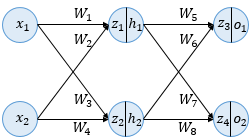

$z_{1}=W_{1}x_{1} + W_{2}x_{2}=0.29959556 \text{×} 0.1 + 0.24919112 \text{×} 0.2= 0.07979778$

$z_{2}=W_{3}x_{1} + W_{4}x_{2}=0.39964496 \text{×} 0.1 + 0.34928991 \text{×} 0.2= 0.10982248$

$h_{1}=sigmoid(z_{1}) = 0.51993887$

$h_{2}=sigmoid(z_{2}) = 0.52742806$

$z_{3}=W_{5}h_{1}+W_{6}h_{2} = 0.43703857 \text{×} h_{1} + 0.38685205 \text{×} h_{2} = 0.43126996$

$z_{4}=W_{7}h_{1}+W_{8}h_{2} = 0.69629578 \text{×} h_{1} + 0.59624247 \text{×} h_{2} = 0.67650625$

$o_{1}=sigmoid(z_{3})=0.60617688$

$o_{2}=sigmoid(z_{4})=0.66295848$

$E_{o1}=\frac{1}{2}(target_{o1}-output_{o1})^{2}=0.02125445$

$E_{o2}=\frac{1}{2}(target_{o2}-output_{o2})^{2}=0.00198189$

$E_{total}=E_{o1}+E_{o2}=0.02323634$



기존 오차가 0.02397190 였으므로 감소한 것을 확인 할 수 있다

기존까지 배운 내용은 모두 단층 구조를 가졌으나, 층이 둘 이상인 경우도 마찬가지로 backpropagation을 통해 모든 가중치를 업데이트 할 수 있다

##### **1-4) Activation Function**

활성화 함수(Activation function)는 입력을 받아 수학적 변환을 수행하고 출력을 생성하는 함수이다

앞서 배운 Sigmoid function 이나 Softmax function은 대표적인 활성화 함수다

사실 ANN 에서 activation function으로 Sigmoid function을 사용하는것은 결과가 그리 좋지 못하다

그 이유와 함께 다른 activation function (ReLU 등) 을 소개한다

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ANN에서 사용하는 Activation function은 기본적으로 비선형 함수여야 한다

예를 들어 activation function이 다음과 같은 선형 함수라 하자

$f(x) = Wx$

이 때, hidden layer를 총 두 층 추가하면 입력 - hidden - 출력 과정에서 계산되는 예측값은 다음과 같다

$y(x) = f(f(f(x)))$

이는 다시 표현하자면 $y = W × W × W × x$ 이고, $W^3 = k$ 라고 한다면, 이는 결국 

$y(x) = kx$ 와 같이 표현 가능하다

즉, hidden layer 를 두 층 추가했음에도 $k$ 라는 가중치 하나만을 업데이트 한 것과 같은 효과를 가진다

따라서 선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 큰 차이를 줄 수 없다

다음으로 아래와 같이 4개의 입력값을 받고 Sigmoid function을 activation function으로 사용하는 경우를 고려해보자

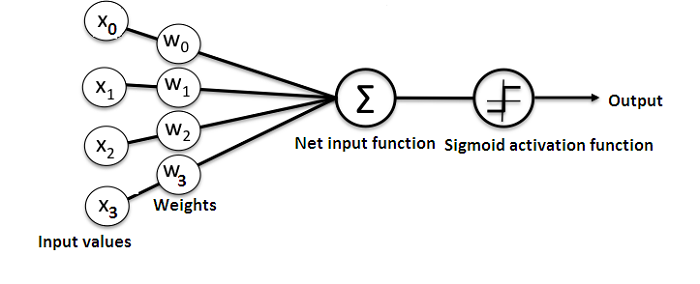

ANN의 학습은 다음과 같다
1. 입력에 대해서 순전파(forward propagation) 연산
2. 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산
3. 손실(loss)을 미분을 통해서 기울기(gradient)를 구함
4. 이를 통해 역전파(back propagation)를 수행하여 가중치 업데이트

여기서 Sigmoid function의 경우, 3번의 gradient를 구할 때 발생한다

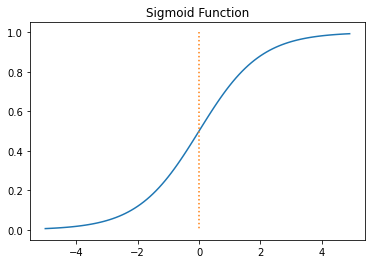

In [ ]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

여기서 우리는 0 근처의 기울기는 큰 반면, 출력값이 0 혹은 1에 가까울수록 기울기가 0에 가까워 지는 것을 확인 할 수 있다

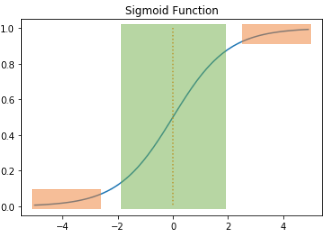

이 때, 위 그림의 주황색 부분에서 미분을 수행하면 기울기가 0에 가깝게 나온다

이렇게 작은 기울기가 나오면 backpropagation 과정에서 앞 부분 layer에 기울기가 거의 전달되지 않는다

이를 **기울기 소실 (Gradient Vanishing)** 문제라고 한다

Activation function으로 Sigmoid function을 사용하는 경우, 0에 가까운 기울기가 계속해서 곱해진다면 아래와 같이 복잡한 DNN의 경우 앞 layer의 가중치 업데이트가 매우 어렵다

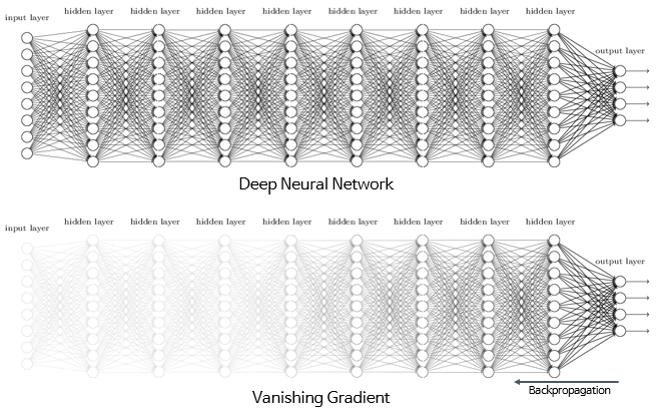

이를 방지하기 위해 사용되는 다른 대표적인 Activation function들은 아래와 같다

1. **Hyperbolic tangent function**
2. **ReLU function**
3. **Leaky ReLU**

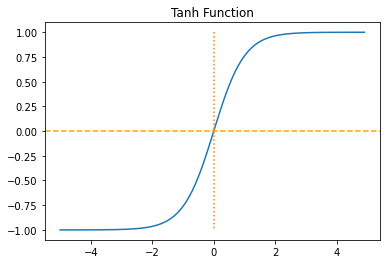

In [ ]:
# Tangent hyperbolic function

x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

하이퍼볼릭탄젠트 함수도 -1과 1에 가까운 출력값을 출력할 때, Sigmoid function와 같은 문제가 발생한다

그러나 하이퍼볼릭탄젠트 함수의 경우에는 Sigmoid function보다 반환값의 변화폭이 더 크다

이로 인해 Sigmoid function보다는 기울기 소실 증상이 적고, Sigmoid function보다는 많이 사용된다

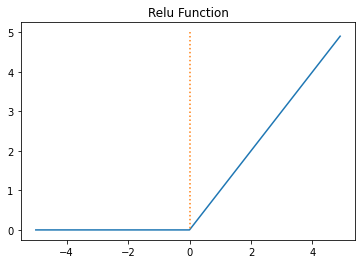

In [ ]:
# ReLU function

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

가장 많이 쓰이던 Activation function으로, Rectified Linear Unit의 약자이다


수식은 $f(x)=max(0,x)$ 로 간단히 나타난다


ReLU function은 음수가 들어오면 0, 양수가 들어오면 $y=x$ 를 반환한다

ReLU function의 경우 특정 양수값에 수렴하지 않으므로 DNN에서 Sigmoid보다 훨씬 더 잘 작동한다

뿐만 아니라, ReLU 는 Sigmoid, tanh와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠르다 

하지만 여전히 입력값이 음수이면 기울기가 0이 된다는 문제가 발생하고, 이 경우 뉴런이 다시 활성화 되는 것이 매우 어렵다

이 문제를 죽은 ReLU (Dying ReLU) 라고 부른다

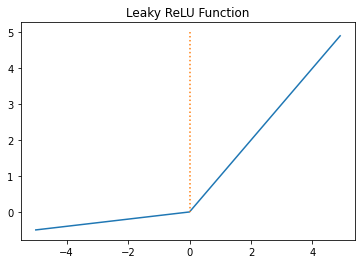

In [ ]:
# Leaky ReLU function
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

위에서 본 ReLU의 문제를 해결하기 위해 고안된 대표적인 activation function 이다

Leaky ReLU는 입력값이 음수일 경우 0 대신 아주 작은 값을 반환하도록 설계되어 있다

수식은 $f(x) = max(ax, x)$ 로 간단히 표현된다

여기서 $a$는 조절 가능한 hyperparameter로 Leaky, 즉 새는 정도를 결정한다

입력값이 음수라도 기울기가 0이 되지 않으므로 Dying ReLU와 같은 문제는 일어나지 않는다

Sigmoid, Softmax 등 앞서 배운 기본적인 activation function 또한 사용되지 않는 것은 아니다

Classification 문제 등에서 분류작업을 수행하기 위해 마지막 출력층에 두 함수를 적용하여 사용하게 된다

**참고**

* 시그모이드 함수의 또 다른 문제점은 원점 중심이 아니라는 점이다(Not zero-centered). 따라서, 평균이 0이 아니라 0.5이며, 시그모이드 함수는 항상 양수를 출력하기 때문에 출력의 가중치 합이 입력의 가중치 합보다 커질 가능성이 높다. 이것을 편향 이동(bias shift)이라 하며, 이러한 이유로 각 레이어를 지날 때마다 분산이 계속 커져 가장 높은 레이어에서는 활성화 함수의 출력이 0이나 1로 수렴하게 되어 기울기 소실 문제가 일어날 수 있다.

* 하이퍼볼릭탄젠트 함수는 원점 중심(zero-centered)이기 때문에, 시그모이드와 달리 편향 이동은 일어나지 않는다. 하지만 하이퍼볼릭탄젠트 함수 또한 입력의 절대값이 클 경우 -1이나 1로 수렴하게 되는데, 이때 기울기가 완만해지므로 역시나 기울기 소실 문제가 일어날 수 있다.

### **2) Perceptron**

##### **2-1) Single-layer Perceptron**

Perceptron의 구조는 다음과 같았다

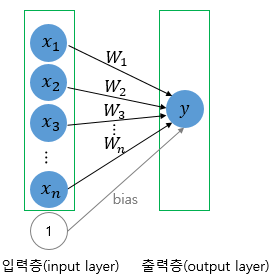

이런 Single-layer perceptron 은 논리회로를 만드는데 쓰이는 AND, NAND, OR 게이트를 구현할 수 있다

* **AND gate** :

|$x_1$|$x_2$|$y$|
|:---:|:---:|:-:|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

* **NAND gate** :

|$x_1$|$x_2$|$y$|
|:---:|:---:|:-:|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

* **OR gate** :

|$x_1$|$x_2$|$y$|
|:---:|:---:|:-:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

In [ ]:
# 직접 가중치를 정하여 AND, NAND, OR gate 구현하기

# AND gate
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

# NAND gate
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

# OR gate
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
# AND gate 출력
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [ ]:
# NAND gate 출력
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

In [ ]:
# OR gate 출력
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

위 내용을 시각화 하면 아래와 같이 나타낼 수 있다

AND gate의 경우

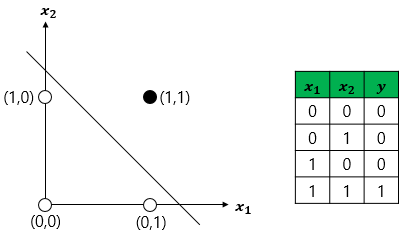

NAND 와 OR gate의 경우

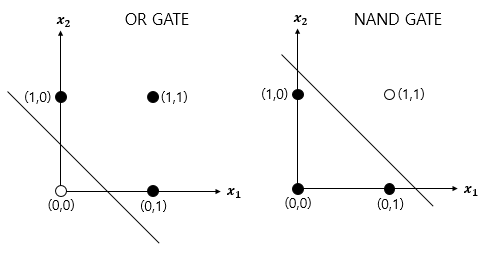

다만 이 Single-layer perceptron은 아래와 같은 XOR gate를 구현할 수는 없다
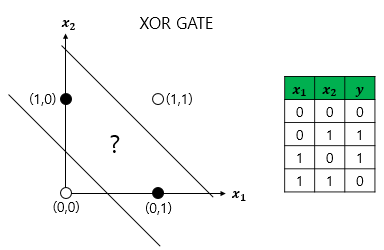


XOR gate를 구현하기 위해서는 아래에서 소개할 다층 퍼셉트론 (Multi-layer perceptron, MLP)을 사용해야 한다

##### **2-2) Multi-layer Perceptron**

XOR 게이트는 기존의 AND, NAND, OR 게이트를 조합하면 만들 수 있다

즉, perceptron의 layer를 아래 그림과 같이 더 쌓으면 만들 수 있다

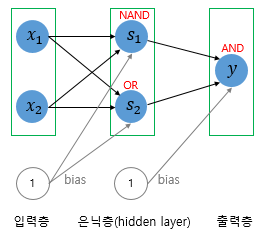

SLP 과 MLP의 차이는 바로 이 중간 은닉층 (hidden layer)가 존재하는지 아닌지 여부이다

아래는 직접 AND, OR, NAND gate를 조합하여 층을 쌓아) XOR gate를 구현하는 과정이다

In [ ]:
# AND gate
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

# NAND gate
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

# OR gate
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1


# 위를 조합하여 XOR gate 만들기 

def XOR_gate(x1, x2) :
    hidden1 = NAND_gate(x1, x2)
    hidden2 = OR_gate(x1, x2)
    output = AND_gate(hidden1, hidden2)
    
    return output

In [ ]:
# XOR gate 출력
XOR_gate(0, 0), XOR_gate(0, 1), XOR_gate(1, 0), XOR_gate(1, 1)

(0, 1, 1, 0)

MLP는 hidden layer가 두 층 이상일 수도 있다 (사용자가 원하는 만큼 추가 할 수 있다)

아래 그림과 같이 hidden layer가 두 층 이상인 MLP를 주로 심층 신경망 (Deep Neural Network, DNN)이라고 한다

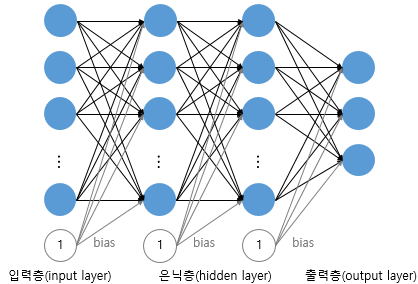

위에서 직접 입력한 가중치 w1, w2를 이번에는 PyTorch를 사용해 기계가 찾을 수 있도록 해보자

앞서 배운 내용과 똑같이 모델이 Loss function, optimizer 등을 이용해 최적의 가중치를 스스로 학습하는 과정을 통해 각 gate를 구현 할 수 있다

만약 학습하는 모델이 DNN 구조를 가질경우, 이를 Deep Learning 이라고 부른다

### **3) SLP, MLP를 이용한 XOR gate 구현**

##### **3-1) SLP를 이용한 XOR gate 구현**

실제로 SLP가 XOR gate를 만들 수 없는지 확인하기 위해 모델을 만들어 학습시켜보자

In [ ]:
# 필요한 패키지 import, GPU 사용 설정

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# GPU 사용 확인

print(device)

cuda


In [ ]:
# XOR gate를 위한 입력, 출력 데이터 정의 ( to(deivce)는 GPU 사용을 위해 추가 )

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
# Step function대신 Sigmoid 함수를 사용해 SLP 모델 구현

model = nn.Sequential(
    nn.Linear(2,1, bias=True),
    nn.Sigmoid()
).to(device)

In [ ]:
# 출력값은 0 혹은 1을 가지는 이진 분류 문제이므로 Logistic regression에서 사용한 BCE를 loss function으로 사용
# 비용 함수와 옵티마이저 정의

criterion = torch.nn.BCELoss().to(device) # loss 함수 자체를 선언할때는 criterion이라는 표현을 자주 쓴다
optimizer = torch.optim.SGD(model.parameters(), lr=1)

e = []
l = []

Epoch :  0  Loss :  0.7273974418640137
Epoch :  1000  Loss :  0.6931471824645996
Epoch :  2000  Loss :  0.6931471824645996
Epoch :  3000  Loss :  0.6931471824645996
Epoch :  4000  Loss :  0.6931471824645996
Epoch :  5000  Loss :  0.6931471824645996
Epoch :  6000  Loss :  0.6931471824645996
Epoch :  7000  Loss :  0.6931471824645996
Epoch :  8000  Loss :  0.6931471824645996
Epoch :  9000  Loss :  0.6931471824645996
Epoch :  10000  Loss :  0.6931471824645996


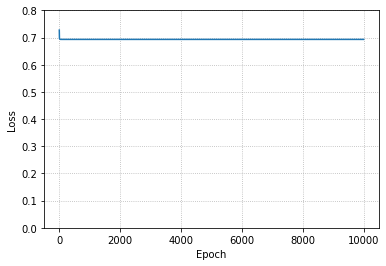

In [ ]:
# 10,000번의 에포크 수행

for epoch in range(10000):

    hypothesis = model(X)
    loss = criterion(hypothesis, Y)

    # 비용 계산 후 가중치 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    e = np.append(e, epoch)
    l = np.append(l, loss.cpu().detach().numpy())

    if epoch % 1000 == 0 : # 1000번째 에포크마다 비용 출력
      print("Epoch : ", epoch, " Loss : ", loss.item())
    if epoch == 9999 :
      print("Epoch : ", epoch+1, " Loss : ", loss.item())

plt.plot(e, l)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(linestyle=":")
plt.ylim(0,0.8)
plt.show()

위 Loss 그래프에서 볼 수 있듯 학습이 전혀 되지 않는다

이를 직접 예측값을 통해 확인하자면 아래와 같다

In [ ]:
# 학습한 모델의 예측값 확인

with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().squeeze().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().squeeze().numpy())
    print('실제값(Y): ', Y.cpu().squeeze().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [0.5 0.5 0.5 0.5]
모델의 예측값(Predicted):  [0. 0. 0. 0.]
실제값(Y):  [0. 1. 1. 0.]
정확도(Accuracy):  0.5


##### **3-2)MLP를 이용한 XOR gate 구현**

이번에는 MLP를 사용하여 XOR gate를 구현해본다

In [ ]:
# 필요한 패키지 import, GPU 사용 설정

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
print(device)

cuda


In [ ]:
# XOR gate를 위한 입력, 출력 데이터 정의 ( to(deivce)는 GPU 사용을 위해 추가 )

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
# 입력층, hidden layer 3층, 출력층 총 5개의 layer를 가지는 MLP를 만든다
# 매 층마다 Sigmoid function을 activation function으로 사용한다

model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),

          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),

          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),

          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()

          ).to(device)

위 모델을 도식화하면 아래와 같다 (bias 생략)

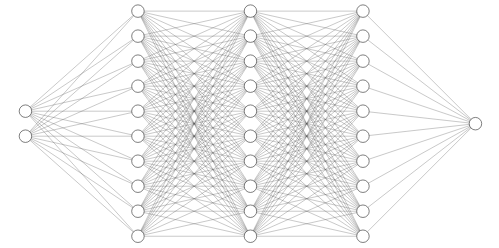

In [ ]:
# loss function, optimizer 선언 

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1) 

In [ ]:
e = []
l = []

Epoch :  0  Loss :  0.6948983669281006
Epoch :  1000  Loss :  0.6931380033493042
Epoch :  2000  Loss :  0.6931172609329224
Epoch :  3000  Loss :  0.6930763721466064
Epoch :  4000  Loss :  0.6929103136062622
Epoch :  5000  Loss :  0.6820817589759827
Epoch :  6000  Loss :  0.0013030603295192122
Epoch :  7000  Loss :  0.00048370816512033343
Epoch :  8000  Loss :  0.0002889616880565882
Epoch :  9000  Loss :  0.00020376498287077993
Epoch :  10000  Loss :  0.00015651952708140016


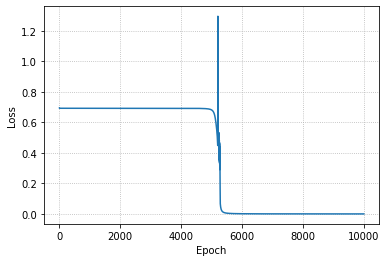

In [ ]:
# 10000 에폭 학습

for epoch in range(10000):

    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    loss = criterion(hypothesis, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    e = np.append(e, epoch)
    l = np.append(l, loss.cpu().detach().numpy())

    if epoch % 1000 == 0 : # 1000번째 에포크마다 비용 출력
      print("Epoch : ", epoch, " Loss : ", loss.item())
    if epoch == 9999 :
      print("Epoch : ", epoch+1, " Loss : ", loss.item())

plt.plot(e, l)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(linestyle=":")
plt.show()

In [ ]:
# 학습한 모델의 예측값 확인

with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().squeeze().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().squeeze().numpy())
    print('실제값(Y): ', Y.cpu().squeeze().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [1.1170622e-04 9.9982882e-01 9.9984229e-01 1.8533350e-04]
모델의 예측값(Predicted):  [0. 1. 1. 0.]
실제값(Y):  [0. 1. 1. 0.]
정확도(Accuracy):  1.0


위와 같이 XOR gate를 풀 수 있는 MLP 모델을 만들 수 있었다

만약 위 모델에서 hidden layer 사이 activation function을 ReLU를 사용하면 결과는 아래와 같다

Epoch :  0  Loss :  0.6926730275154114
Epoch :  1000  Loss :  0.0009320397512055933
Epoch :  2000  Loss :  0.00030070095090195537
Epoch :  3000  Loss :  0.00016786374908406287
Epoch :  4000  Loss :  0.00011328637629048899
Epoch :  5000  Loss :  8.422563405474648e-05
Epoch :  6000  Loss :  6.640222272835672e-05
Epoch :  7000  Loss :  5.436121500679292e-05
Epoch :  8000  Loss :  4.583723421092145e-05
Epoch :  9000  Loss :  3.9459213439840823e-05
Epoch :  10000  Loss :  3.4586315450724214e-05


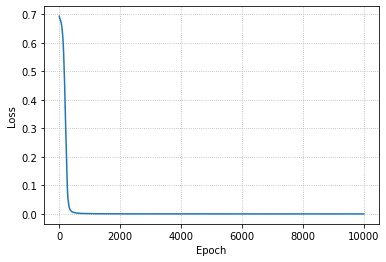

In [ ]:
# 필요한 패키지 import, GPU 사용 설정

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# XOR gate를 위한 입력, 출력 데이터 정의 ( to(deivce)는 GPU 사용을 위해 추가 )

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

# 입력층, hidden layer 3층, 출력층 총 5개의 layer를 가지는 MLP를 만든다
# 매 층마다 ReLU function을 activation function으로 사용한다

model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.ReLU(),

          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.ReLU(),

          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.ReLU(),

          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()

          ).to(device)

# loss function, optimizer 선언 

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1) 

e = []
l = []

# 10000 에폭 학습

for epoch in range(10000):

    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    loss = criterion(hypothesis, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    e = np.append(e, epoch)
    l = np.append(l, loss.cpu().detach().numpy())

    if epoch % 1000 == 0 : # 1000번째 에포크마다 비용 출력
      print("Epoch : ", epoch, " Loss : ", loss.item())
    if epoch == 9999 :
      print("Epoch : ", epoch+1, " Loss : ", loss.item())

plt.plot(e, l)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(linestyle=":")
plt.show()

In [ ]:
# 학습한 모델의 예측값 확인

with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().squeeze().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().squeeze().numpy())
    print('실제값(Y): ', Y.cpu().squeeze().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [4.9587834e-05 9.9998486e-01 9.9994993e-01 2.3521912e-05]
모델의 예측값(Predicted):  [0. 1. 1. 0.]
실제값(Y):  [0. 1. 1. 0.]
정확도(Accuracy):  1.0


Loss 그래프에서 확인 가능하듯 loss 값이 안정적으로 감소하는 것을 확인 가능하다

### **4) MLP로 MNIST 손글씨 분류하기**

MLP를 사용하여 MNIST 손글씨 데이터셋을 분류하는 작업을 진행해보자

MNIST는 숫자 0부터 9까지의 이미지로 구성된 손글씨 데이터셋이다

이 데이터는 과거에 우체국에서 편지의 우편 번호를 인식하기 위해서 만들어진 훈련 데이터로, 총 60,000개의 훈련 데이터와 레이블, 총 10,000개의 테스트 데이터와 레이블로 구성되어져 있다

레이블은 0부터 9까지 총 10개이다

각 이미지는 28x28 픽셀로 아래와 같이 구성되어 있다

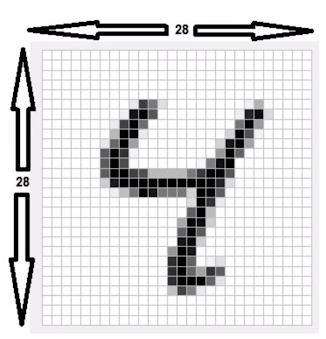

이 28x28 이미지를 일렬로 풀어서 28x28=784 개의 원소를 가지는 벡터로 만들어 학습을 진행된다

즉, 한 개의 sample이 784개의 feature ($x_1 ... x_{784}$)를 가진다

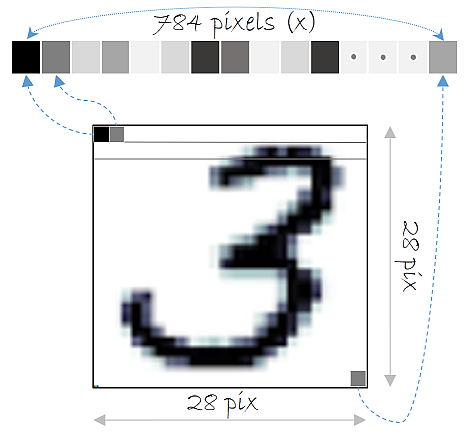

In [ ]:
# 데이터 로드

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)

In [ ]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

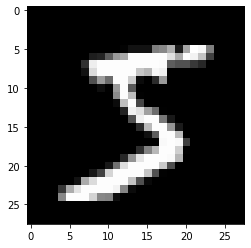

In [ ]:
plt.imshow(mnist.data[0].reshape(28,28), cmap='gray')

In [ ]:
mnist.target[0]

'5'

In [ ]:
mnist.target = mnist.target.astype(np.int8)

X = mnist.data / 255  # 0-255사이값을 가지는 픽셀을 [0,1] 구간으로 정규화
y = mnist.target

In [ ]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
Y[0]

tensor([0.], device='cuda:0')

In [ ]:
# 데이터 셋 로드

import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
# Train, test dataset 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [ ]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


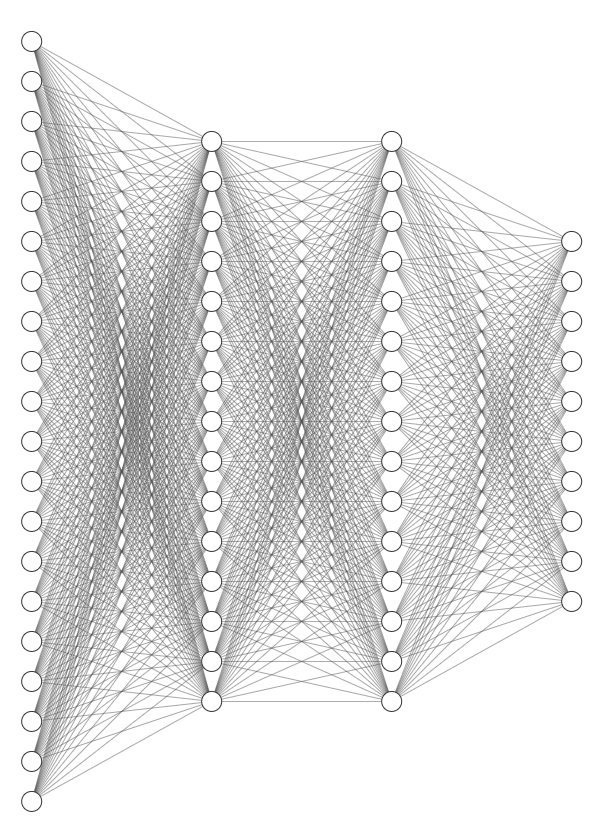

In [ ]:
from torch import optim

# 오차함수 선택, 다중 클래스 분류를 위해 CE
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 optimizer 선택, ADAM 사용
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# 학습 함수 선언

def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{} 학습 완료 \n".format(epoch))

In [ ]:
# 테스트 함수 선언

def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [ ]:
# 실제로 잘 예측하는지 직접 확인하는 함수 선언

def eval(index) :
  model.eval()  # 신경망을 추론 모드로 전환
  data = X_test[index]
  output = model(data)  # 데이터를 입력하고 출력을 계산
  _, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

  print("예측 결과 : {}".format(predicted))

  X_test_show = (X_test[index]).numpy()
  plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
  print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

In [ ]:
# 학습 하지 않은 모델로 테스트 진행

test()


테스트 데이터에서 예측 정확도: 850/10000 (8%)



0~9 까지 손글씨를 랜덤하게 분류하므로 ~10% 정확도, 즉 찍기와 동일한 정확도를 보인다

예측 결과 : 2
이 이미지 데이터의 정답 레이블은 6입니다


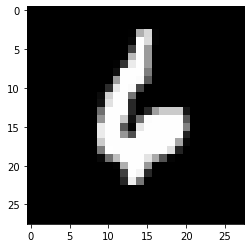

In [ ]:
# 학습 전 모델이 잘못 예측하는 모습

eval(2021)

예측 결과 : 2
이 이미지 데이터의 정답 레이블은 8입니다


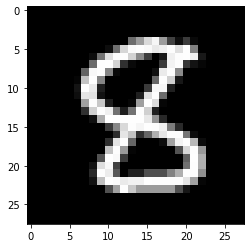

In [ ]:
eval(314)

예측 결과 : 2
이 이미지 데이터의 정답 레이블은 7입니다


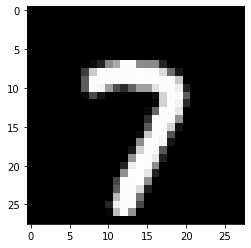

In [ ]:
eval(28)

In [ ]:
# 10 에폭동안 모델 학습 후 다시 테스트 진행

for epoch in range(10):
    train(epoch)

test()

epoch0 학습 완료 

epoch1 학습 완료 

epoch2 학습 완료 

epoch3 학습 완료 

epoch4 학습 완료 

epoch5 학습 완료 

epoch6 학습 완료 

epoch7 학습 완료 

epoch8 학습 완료 

epoch9 학습 완료 


테스트 데이터에서 예측 정확도: 9665/10000 (97%)



예측 결과 : 6
이 이미지 데이터의 정답 레이블은 6입니다


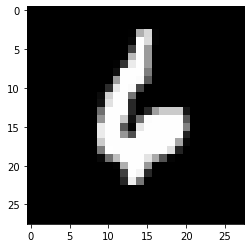

In [ ]:
eval(2021)

예측 결과 : 8
이 이미지 데이터의 정답 레이블은 8입니다


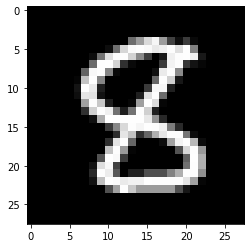

In [ ]:
eval(314)

예측 결과 : 7
이 이미지 데이터의 정답 레이블은 7입니다


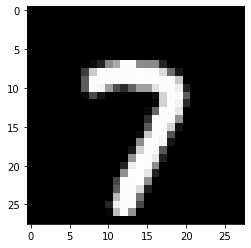

In [ ]:
eval(28)